# Run regrid operation on CMIP5

**Rooki** calls climate data operations on the **rook** processing service.

In [1]:
import os
os.environ['ROOK_URL'] = 'http://rook.dkrz.de/wps'

from rooki import rooki
from rooki import operators as ops

## Parameters of regrid operation

In [2]:
rooki.regrid?

Signature: rooki.regrid(collection, method='nearest_s2d', grid='auto')
Docstring:
Run regridding operator on climate model data using daops (xarray).

Parameters
----------
collection : string
    A dataset identifier or list of comma separated identifiers. Example: c3s-cmip5.output1.ICHEC.EC-EARTH.historical.day.atmos.day.r1i1p1.tas.latest
method : {'nearest_s2d', 'bilinear', 'conservative', 'patch'}string
    Please specify regridding method like consevative or bilinear. Default: nearest_s2d
grid : {'auto', '0pt25deg', '0pt25deg_era5', '0pt5deg_lsm', '0pt625x0pt5deg', '0pt75deg', '1deg', '1pt25deg', '2pt5deg'}string
    Please specify output grid resolution for regridding. Default: auto

Returns
-------
output : ComplexData:mimetype:`application/metalink+xml; version=4.0`
    Metalink v4 document with references to NetCDF files.
prov : ComplexData:mimetype:`application/json`
    Provenance document using W3C standard.
prov_plot : ComplexData:mimetype:`image/png`
    Provenance docume

## workfow: subset only

In [3]:
tas = ops.Input(
    'tas', ['c3s-cmip5.output1.BCC.bcc-csm1-1-m.rcp85.mon.atmos.Amon.r1i1p1.tas.v20181201']
)

wf = ops.Subset(tas, time="2030-01/2030-01")

In [4]:
resp = wf.orchestrate()
resp.ok 

True

In [5]:
ds = resp.datasets()[0]
ds

<xarray.Dataset>
Dimensions:    (time: 1, bnds: 2, lat: 160, lon: 320)
Coordinates:
  * time       (time) object 2030-01-16 12:00:00
  * lat        (lat) float64 -89.14 -88.03 -86.91 -85.79 ... 86.91 88.03 89.14
  * lon        (lon) float64 0.0 1.125 2.25 3.375 ... 355.5 356.6 357.8 358.9
    height     float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    tas        (time, lat, lon) float32 ...
Attributes: (12/30)
    institution:            Beijing Climate Center(BCC),China Meteorological ...
    institute_id:           BCC
    experiment_id:          rcp85
    source:                 bcc-csm1-1-m:atmosphere:  BCC_AGCM2.2 (T106L26); ...
    model_id:               bcc-csm1-1-m
    forcing:                Nat Ant GHG SD Oz Sl SS Ds BC OC
    ...                     ...
    modeling_realm:         atmos
    realization:            1
    cmor_version:           2.5.6
    NCO:                    4.7.3
    cp4cds_update_info:     As part of the Climate Projections for the Copern...
    source_tracking_id:     d3e31953-43c3-43a5-863d-33f9644caa60

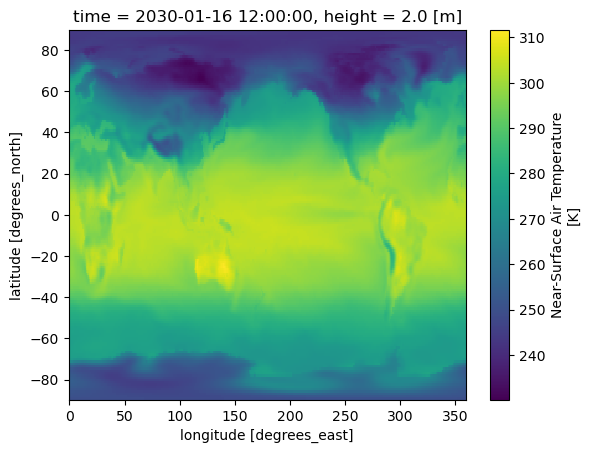

In [6]:
ds.tas.isel(time=0).plot()

## workflow: subset + regrid


In [7]:
tas = ops.Input(
    'tas', ['c3s-cmip5.output1.BCC.bcc-csm1-1-m.rcp85.mon.atmos.Amon.r1i1p1.tas.v20181201']
)

wf = ops.Subset(tas, time="2030-01/2030-01")

wf = ops.Regrid(wf, method="nearest_s2d", grid="1deg")

In [8]:
resp = wf.orchestrate()
resp.ok 

True

In [9]:
ds = resp.datasets()[0]
ds

<xarray.Dataset>
Dimensions:    (lat: 180, lon: 360, bnds: 2, time: 1)
Coordinates:
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
  * time       (time) object 2030-01-16 12:00:00
    height     float64 ...
    time_bnds  (time, bnds) object ...
Dimensions without coordinates: bnds
Data variables:
    tas        (time, lat, lon) float32 ...
Attributes: (12/35)
    institution:            Beijing Climate Center(BCC),China Meteorological ...
    institute_id:           BCC
    experiment_id:          rcp85
    source:                 bcc-csm1-1-m:atmosphere:  BCC_AGCM2.2 (T106L26); ...
    model_id:               bcc-csm1-1-m
    forcing:                Nat Ant GHG SD Oz Sl SS Ds BC OC
    ...                     ...
    source_tracking_id:     d3e31953-43c3-43a5-863d-33f9644caa60
    grid:                   Global 1.0 degree grid with one cell centered at ...
    grid_label:             gr
    regrid_operation:       nearest_s2d_160x320_180x360_peri
    regrid_tool:            xESMF_v0.8.6
    regrid_weights_uid:     19b9d3851059214cb4c3af469c4e6ebc_d24f4f689f120994...

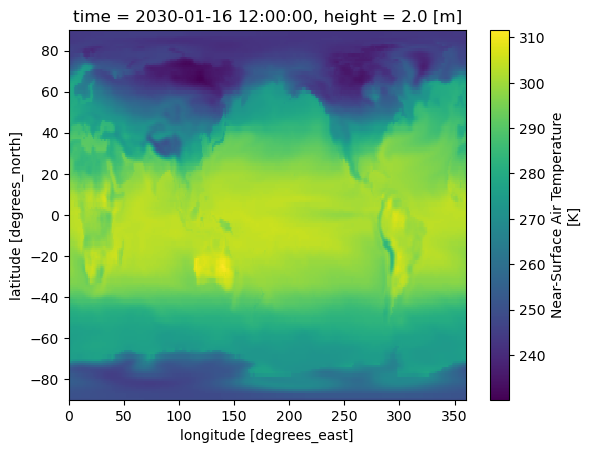

In [10]:
ds.tas.isel(time=0).plot()